<a href="https://colab.research.google.com/github/aratrika007/ML_Lab/blob/main/Assignment_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 3

First, we install the package opendatasets and then import the necessary ones.

In [ ]:
pip install opendatasets

In [ ]:
import opendatasets as od
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.inspection import DecisionBoundaryDisplay
import matplotlib.pyplot as plt

Then we download the Titanic dataset.

In [37]:
od.download("https://www.kaggle.com/heptapod/titanic/version/1#")

Skipping, found downloaded files in "./titanic" (use force=True to force download)


After that, we read the data using read_cv from pandas and change the name of the column misspelled as
'2urvived'.

In [38]:
df1 = pd.read_csv("/content/titanic/train_and_test2.csv")

In [39]:
df1

,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1305,1306,39.0,108.9000,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,0
1306,1307,38.5,7.2500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1307,1308,28.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [ ]:

df1 = df1.dropna()
df1.rename(columns={'2urvived' :'survived'}, inplace=True)

Then, we remove all the redundant columns.

In [ ]:
# All the zero column are not useful (kaggle says all of them are zero)
# Hence, ignoring them
# Also dropping "Passengerid" cause using pandas internal 0-index id
df1 = df1[filter(
 lambda colName: "zero" not in colName,
 df1.columns
 )]
df1 = df1.drop("Passengerid", axis=1)
df1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1307 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1307 non-null   float64
 1   Fare      1307 non-null   float64
 2   Sex       1307 non-null   int64  
 3   sibsp     1307 non-null   int64  
 4   Parch     1307 non-null   int64  
 5   Pclass    1307 non-null   int64  
 6   Embarked  1307 non-null   float64
 7   survived  1307 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 91.9 KB


We plot the heatmap of the different features of the dataset.


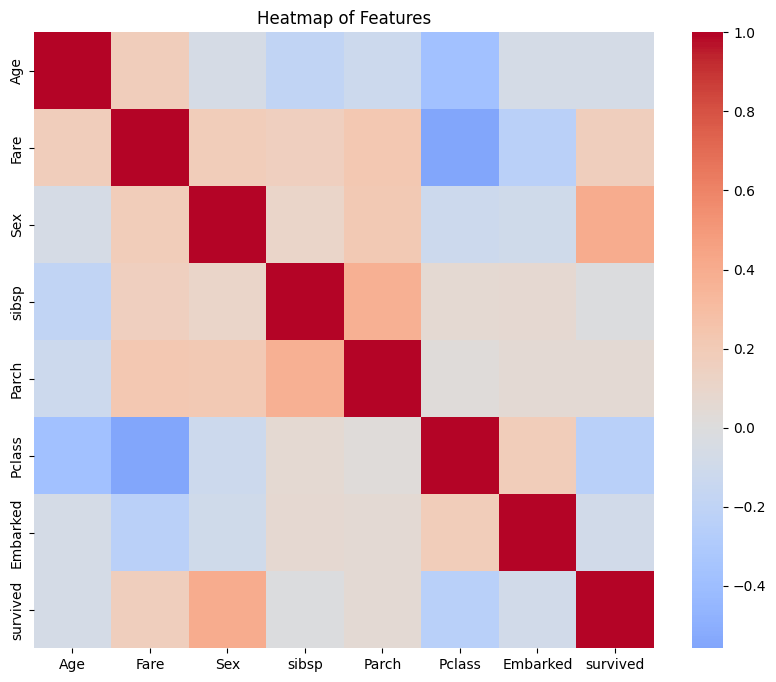

In [ ]:
# Calculate the correlation matrix
correlation_matrix1 = df1.corr()
# Set the figure size
plt.figure(figsize=(10,8))
# Create the heatmap
sns.heatmap(correlation_matrix1, annot=False, cmap='coolwarm', center=0)
# Plot
plt.title('Heatmap of Features')
plt.show()

Now, the dataset is split in a 85:15 ratio and then Logistic Regression is applied.

In [ ]:
# Splitting
Q1X = df1.drop('survived', axis=1)
Q1Y = df1['survived']
Q1X_train, Q1X_test, Q1Y_train, Q1Y_test = train_test_split(Q1X, Q1Y,
test_size=0.15, random_state=300)


In [ ]:
model1 = LogisticRegression(max_iter=5000)
model1.fit(Q1X_train, Q1Y_train)
accuracy1 = model1.score(Q1X_test,Q1Y_test)
print(f"Accuracy = {accuracy1}")

Accuracy = 0.8426395939086294


## Question no. 2:
For this, we define a function which can train regression models with different solvers and Inverse of
Regularization Strength values, and return accuracies.


In [ ]:
def trainer(X_train, Y_train, X_test, Y_test, S, P, a):
 model = LogisticRegression(solver=S, max_iter=10000, penalty=P, C=a)
 model.fit(X_train, Y_train)
 predictions = model.predict(X_test)
 accuracy = accuracy_score(Y_test,predictions)
 return {
 "Solver": S,
 "Penalty": P,
 "Inverse of Regularization Strength": a,
 "Accuracy score": accuracy,
 "Coefficients": model.coef_.tolist()[0],
 }
arr = [0.1, 0.25, 0.5, 0.75, 0.9]
data_saga = [trainer(Q1X_train, Q1Y_train, Q1X_test, Q1Y_test, 'saga', 'l1', a)
for a in arr]
data_lbfgs = [trainer(Q1X_train, Q1Y_train, Q1X_test, Q1Y_test, 'lbfgs', 'l2', a)
for a in arr]
# Collecting the "Accuracy score" from the return values
accuracy_saga = []
accuracy_lbfgs = []
for i in data_saga:
 accuracy_saga.append(i.get("Accuracy score"))
for i in data_lbfgs:
 accuracy_lbfgs.append(i.get("Accuracy score"))
print(accuracy_saga)
print(accuracy_lbfgs)

[0.8274111675126904, 0.8223350253807107, 0.8223350253807107, 0.8223350253807107, 0.8223350253807107]
[0.817258883248731, 0.8223350253807107, 0.8375634517766497, 0.8426395939086294, 0.8426395939086294]


Now, we plot a graph to compare the accuracy scores of the models with different solvers and different C
values.


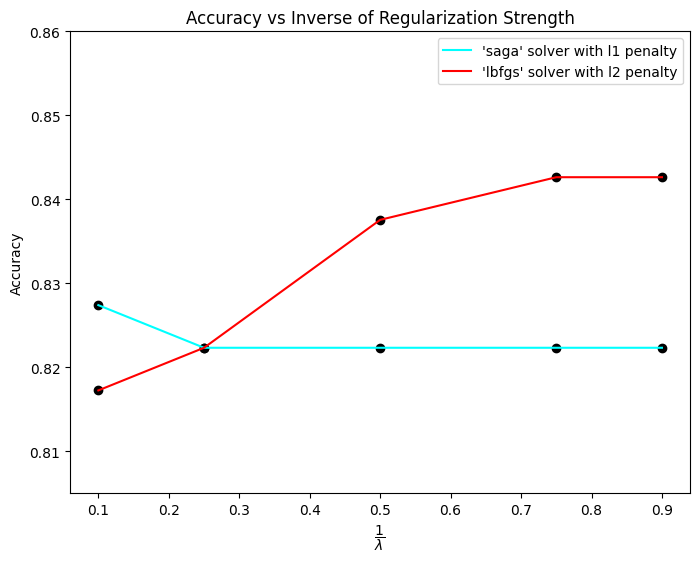

In [ ]:
# Plot the bar graph
plt.figure(figsize=(8, 6))
plt.scatter(arr,accuracy_saga,color='black')
plt.scatter(arr,accuracy_lbfgs,color='black')
plt.plot(arr,accuracy_saga,color='cyan',label='\'saga\' solver with l1 penalty')
plt.plot(arr,accuracy_lbfgs,color='red',label='\'lbfgs\' solver with l2 penalty')
plt.ylim(0.805,0.86)
plt.xlabel(r"$\dfrac{1}{\lambda}$")
plt.ylabel('Accuracy')
plt.legend()
plt.title('Accuracy vs Inverse of Regularization Strength')
plt.show()


## Question no. 3:
Here, we will take the maximum depth from 1 to 10 and check accuracy of Decision Tree Classifier.

In [ ]:
max_depths = range(1,11)
accuracy_Dtree = []
# Train Decision Tree classifiers with varying maximum depths
for val in max_depths:
 classifier = DecisionTreeClassifier(max_depth=val, random_state=90)
 classifier.fit(Q1X_train,Q1Y_train)
 predictions = classifier.predict(Q1X_test)
 accuracy = accuracy_score(Q1Y_test,predictions)
 accuracy_Dtree.append(accuracy)

The accuracy_Dtree array contains the different accuracy values for varying depth of the decision trees.

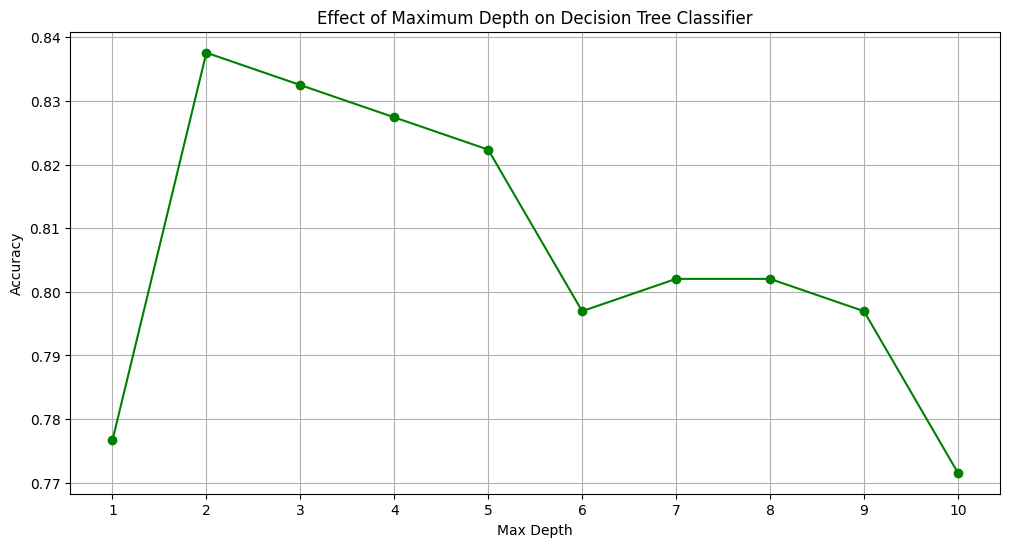

In [ ]:
#Plot accuracy scores against maximum depth values
plt.figure(figsize=(12, 6))
plt.plot(max_depths,accuracy_Dtree,marker='o',color='green')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(max_depths)
plt.title('Effect of Maximum Depth on Decision Tree Classifier')
plt.grid(True)
plt.show()

## Question no. 4:
The Forest Cover Type dataset is downloaded.

In [ ]:
od.download("https://www.kaggle.com/uciml/forest-cover-type-dataset")


Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: aratrika007
Your Kaggle Key: ··········


100%|██████████| 11.2M/11.2M [00:00<00:00, 89.4MB/s]

After that, we read the data using read_cv from pandas.

In [40]:
df2 = pd.read_csv("/content/forest-cover-type-dataset/covtype.csv")


In [42]:
df2.info

<bound method DataFrame.info of         Elevation  Aspect  Slope  Horizontal_Distance_To_Hydrology  \
0            2596      51      3                               258   
1            2590      56      2                               212   
2            2804     139      9                               268   
3            2785     155     18                               242   
4            2595      45      2                               153   
...           ...     ...    ...                               ...   
581007       2396     153     20                                85   
581008       2391     152     19                                67   
581009       2386     159     17                                60   
581010       2384     170     15                                60   
581011       2383     165     13                                60   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Roadways  \
0                                    0              

We have to standardise some columns so that the models can run faster. Here, we have made a list of which
ones to standardise and then defined a function for such.

In [ ]:
# Standardising columns to make models converge faster
def standardize(df: "pd.DataFrame", col_name: "str") -> "pd.DataFrame":
 scaler = StandardScaler()
 df[[col_name]] = pd.DataFrame(
 data=scaler.fit_transform(df[[col_name]]),
 index=df.index,
 columns=[col_name]
 )
 return df
_columns_to_scale = ['Elevation', 'Aspect', 'Slope',
'Horizontal_Distance_To_Hydrology',
 'Vertical_Distance_To_Hydrology',
'Horizontal_Distance_To_Roadways',
 'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
 'Horizontal_Distance_To_Fire_Points']
for val in _columns_to_scale:
 df2 = standardize(df2, val)


Since the dataset is quite large, at first, we reduce the sample to a mere 10% of the original and then split it in
the ratio 9:1.

In [ ]:
# Reducing the sample-size so that convergence is faster
df2_reduced = df2.sample(frac=0.1)
# Splitting
Q2X = df2_reduced.drop('Cover_Type', axis=1)
Q2Y = df2_reduced['Cover_Type']
Q2X_train, Q2X_test, Q2Y_train, Q2Y_test = train_test_split(Q2X, Q2Y,
test_size=0.1, random_state=6432)
print(len(Q2X_train))
print(len(Q2X_test))


52290
5811


In [44]:
df2_reduced.info

<bound method DataFrame.info of         Elevation    Aspect     Slope  Horizontal_Distance_To_Hydrology  \
391462   0.091558 -0.220320  0.386780                          2.373906   
359761  -1.462100 -1.060253 -0.548020                         -1.070003   
164079   0.673733  0.932355  0.253237                          0.651952   
406383   0.570156 -0.890480  1.855750                         -0.444265   
384959  -0.097739 -1.372995  0.520322                          1.639958   
...           ...       ...       ...                               ...   
265550   0.955891  0.280066  0.787408                         -0.411332   
287494  -2.047847  1.388063  1.321579                         -0.759486   
203290   0.945176 -0.908351 -0.948649                         -0.373693   
8429    -1.533532 -0.166707 -0.548020                         -1.267604   
414028  -0.404898  1.075322  1.188036                         -0.373693   

        Vertical_Distance_To_Hydrology  Horizontal_Distance_To_Road

## Question no. 5:
Here, we take a C-Support Vector Classifier with a linear kernel to facilitate faster convergence.

In [ ]:
# Create the model with a C-Support Vector Classifier
svm_classifier = SVC(kernel='linear', C=1.0, random_state=450)
svm_classifier.fit(Q2X_train,Q2Y_train)
predictions = svm_classifier.predict(Q2X_test)
accuracy_svm = accuracy_score(Q2Y_test,predictions)
report = classification_report(Q2Y_test,predictions)
print(f"Accuracy: {accuracy_svm:.2f}")
report

Accuracy: 0.72


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           1       0.68      0.70      0.69      2093\n           2       0.76      0.78      0.77      2895\n           3       0.64      0.87      0.74       327\n           4       0.87      0.41      0.55        32\n           5       0.00      0.00      0.00        93\n           6       0.66      0.26      0.37       163\n           7       0.69      0.52      0.59       208\n\n    accuracy                           0.72      5811\n   macro avg       0.61      0.50      0.53      5811\nweighted avg       0.71      0.72      0.71      5811\n'

We can see, the accuracy of the Support Vector Machine is 0.72.

In [ ]:
print("Classification Report:")
print(report)

Classification Report:
              precision    recall  f1-score   support

           1       0.68      0.70      0.69      2093
           2       0.76      0.78      0.77      2895
           3       0.64      0.87      0.74       327
           4       0.87      0.41      0.55        32
           5       0.00      0.00      0.00        93
           6       0.66      0.26      0.37       163
           7       0.69      0.52      0.59       208

    accuracy                           0.72      5811
   macro avg       0.61      0.50      0.53      5811
weighted avg       0.71      0.72      0.71      5811



## Question no. 6:
We will create the confusion matrix and then plot the heatmap of the above applied SVM method using
seaborn library.

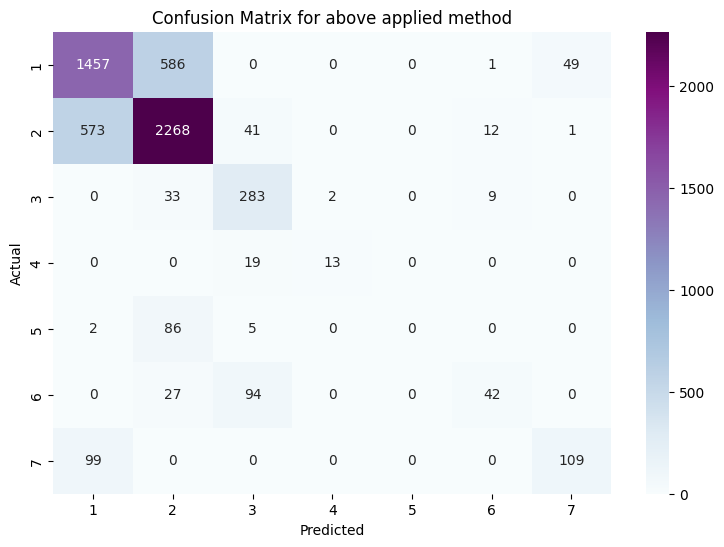

In [ ]:
# Creating the confusion matrix
M = confusion_matrix(Q2Y_test,predictions)
class_labels = np.unique(Q2Y_test)
# Plot the confusion matrix as a heatmap
plt.figure(figsize=(9,6))
sns.heatmap(M, annot=True, fmt='d', cmap='BuPu', xticklabels=class_labels,
yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix for above applied method')
plt.show()

## Question no. 7:
As per question, we can choose any three classes. We chose the values (1, 2 and 3) of the dependent feature
Cover_Type. Furthermore, we have chosen the features ELevation and Aspect for the multiclass logistic
regression model. For visualization of the hyperplanes and the distribution of the data-points, we are using
the DecisionBoundaryDisplay package.


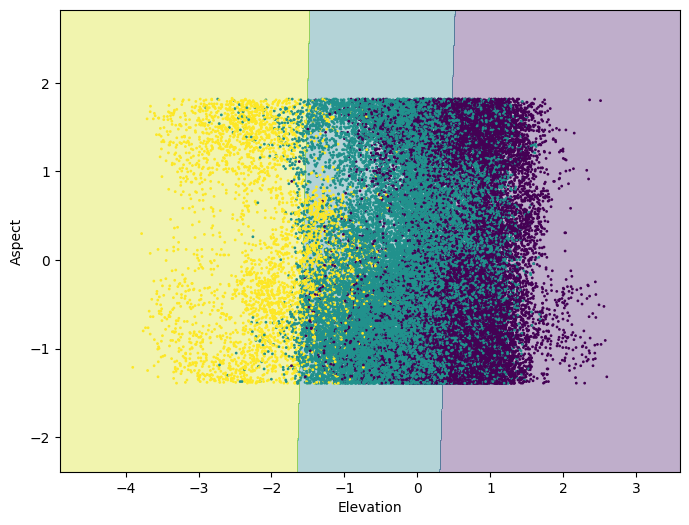

In [47]:
# Picking only 3 classes
sel_df = df2_reduced[df2_reduced['Cover_Type'].isin([1,2,3])]
# Picking only 2 Features to evaluate Cover_Type
sel_df = sel_df[['Elevation', 'Aspect', 'Cover_Type']]
# Create and the Logistic Regression classifier
classifier = LogisticRegression(multi_class='multinomial', solver='lbfgs',
random_state=606)
classifier.fit(sel_df.iloc[:, 0:2], sel_df.iloc[:, 2])
# Visualization using DecisionBoundaryDisplay
disp = DecisionBoundaryDisplay.from_estimator(
classifier,
 sel_df.iloc[:, 0:2],
 xlabel='Elevation',
 ylabel='Aspect',
 alpha=0.35,
 grid_resolution=9000
)
disp.figure_.set_size_inches(8, 6)
disp.ax_.scatter(
 sel_df['Elevation'],
 sel_df['Aspect'],
 c=sel_df['Cover_Type'],
 s=1
)
